# Sentiment analysis on the Amazon review dataset, using Bayesian Classifiers and Bagging

We begin by importing the various libraries and functions we will need.

In [1]:
import timeit
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# Import Bagging
from sklearn.ensemble import BaggingClassifier
# Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

Note that we are importing a previously processed csv file.

In [2]:
# Importing data start timer
print('Importing data')
start = timeit.default_timer()

data_train = pd.read_csv('data/amazon_clean_train.csv', encoding='utf-8')
data_test = pd.read_csv('data/amazon_clean_test.csv', encoding='utf-8')

# Importing data stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)

data_train.Label.value_counts()
data_test.Label.value_counts()

Importing data
Time:  15.5181388


1    200000
0    200000
Name: Label, dtype: int64

We now need to vectorize our data. Here we need to explain some aspects of what we are doing. 

The CountVectorizer was used both to prepare the strings, but also to strip away some useless data (that caused clutter in the dataset). The exact values were found through a bit of trial and error.

The reason we use apply(lambda x: np.str_(x)) is that we had occasional problems where, in spite of our efforts, we found that sometimes a line in the dataset was not recognised as a string. We found that the apply lambda function was a quick and easy way to get around this problem.

In [3]:
cv = CountVectorizer(min_df = 25, max_df = 0.8)
print('Fitting vectors')
# Fitting vectors start timer
start = timeit.default_timer()
trainX = cv.fit_transform(data_train['Review'].apply(lambda x: np.str_(x)))
testX = cv.transform(data_test['Review'].apply(lambda x: np.str_(x)))
testY = data_test['Label'].values.astype(int)
trainY = data_train['Label'].values.astype(int)
# Fitting vectors stop timer
stop = timeit.default_timer()
print('Time: ', stop - start)

Fitting vectors
Time:  182.1412603


## BAYES THEOREM
Bayesian statistics is a collection of tools that is used in a special form of statistical
inference which applies in the analysis of experimental data in many practical
situations in science and engineering. Bayes’ rule is one of the most important
rules in probability theory. (Walpole,2012)
If X and Y are random variables formulation given as:

$$
P(Y \mid X)=\frac{P(X \mid Y) P(Y)}{P(X)}
$$

**Using Bayes Theorem for Classification**


Before describing how Bayes Theorem implemented in classification, framing some parts of the theorem is important. Let X denote an attribute set and Y denote the class variable. If they do not have deterministic relationship with the attributes, X and Y are random variables. Their relationship indicated P(Y|X) known as posterior probability for Y. And its prior probability is P(Y).
For training phase our algorithm should learn posterior probabilities for every combination from training data. By knowing these probabilities, a test set X’ could classified by finding the class Y’ that maximizes the posterior probability, P(Y’|X’). (Tan,2014)
Estimating posterior probabilities for every combination of class label and attribute values is hard because it needs very large training data. So, bayes theorem is useful because it allows expressing posterior probabilities in terms of prior probability P(Y), the class conditional probability P(X|Y), and the evidence, P(X). P(Y) could be estimated from training set. However, to estimate the class conditional probabilities P(X|Y), we use Naïve Bayes Classifier in this project.

**Multinomial Naïve Bayes Classifier**

A Naïve Bayes classifier estimates the class-conditional probability by assuming that the attributes are conditionally independent, given the class label y. The conditional independence assumption can be formally stated as follows (Tan,2014):

$$
P(\mathbf{X} \mid Y=y)=\prod_{i=1}^{d} P\left(X_{i} \mid Y=y\right)
$$

Where Xi = {X1,X2,…,Xd} consists d attributes.

**How Multinomial Naïve Bayes Classifier Works**
Instead of computing class-conditional probability of every combination of X, estimates the conditional probability of each Xi, given Y. So, large volume of training data is not necessary for estimation.
Posterior probability for each class of Y:
$$
P(Y \mid \mathbf{X})=\frac{P(Y) \prod_{i=1}^{d} P\left(X_{i} \mid Y\right)}{P(\mathbf{X})}
$$

Later, we have categorical attributes, and we use multinomial distribution for parameter estimation.


**Estimation of Conditional Probabilities for Categorical Attributes by Using Multinomial Distribution**


Xi is categorical attribute, the conditional probability P (Xi=xi, Yi=y) calculated from training instances in class y.
With Multinomial Distribution(multivariate event model), feature vectors represent the frequencies with which certain events have been generated by a multinomial(p1,...,pn) where pi is the probability that event i occurs. So:

$$
\mathrm{P}\left(\mathrm{X}_{i} \mathrm{~|} \mathrm{Y}\right)=\left(\begin{array}{c}
n \\
x_{1}, x_{2}, \ldots, x_{k}
\end{array}\right) p_{1}^{x_{1}} p_{2}^{x_{2}} \cdots p_{k}^{x_{k}}
$$

**Characteristics of Naïve Bayes Classifiers**


They are robust to isolated noise points because such points are averaged out when estimating conditional probabilities from data. Naïve Bayes classifiers can also handle missing values by ignoring the example during model building and classification. They are robust to irrelevant attributes. If Xi is an irrelevant attribute, then P (Xi|Y ) becomes almost uniformly distributed. The class-conditional probability for Xi has no impact on the overall computation of the posterior probability


## Running Multinomial Bayes

In this simulation we are simply running a normal multinomial Bayes model on our data. The reason we can use such a naive Bayesian model is that we know that the data is perfectly evenly divided between two classes.

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [13]:
## MULTINOMIAL BAYES
# MNB start timer
print('Multinomial Naive Bayes')
start = timeit.default_timer()

# Set multinomial bayes
mnb = MultinomialNB(alpha=1)
mnb.fit(trainX, trainY)
stop = timeit.default_timer()
print('Training time: ', stop - start)
start = timeit.default_timer()
# Make prediction
y_pred = mnb.predict(testX)
# MNB stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_mb = 100*accuracy_score(testY,y_pred)
precision_mb = 100*precision_score(testY,y_pred)
f1_mb = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_mb))
print("Precision: {:.04f}%".format(precision_mb))
print("F1 score: {:.04f}%".format(f1_mb))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Multinomial Naive Bayes
Training time:  1.6493606999999884
Test time:  0.15318019999995158
Out of 400000 datapoints
Accuracy: 84.0925%
Precision: 84.5471%
F1 score: 83.9871%
Confusion Matrix: 
 [[169501  30499]
 [ 33131 166869]]


In [15]:
y_perf_mb = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_mb))
y_val_mb = np.array([accuracy_mb,precision_mb,f1_mb])

<BarContainer object of 3 artists>

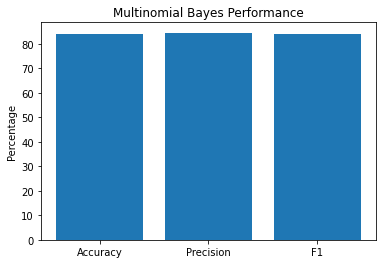

In [16]:
plt.xticks(ypos,y_perf_mb)
plt.ylabel("Percentage")
plt.title("Multinomial Bayes Performance")
plt.bar(ypos,y_val_mb)

The results are fairly decent for such a lightweight model, note the entire calculation took under 1.5 seconds.

## BAGGING
Bootstrap aggregating known as bagging, is taking samples repeatedly from data set according to uniform distribution as indicated figure below. Each bootstrap has same size as the data. But some data points could use more than once in bootstraps. A bootstrap sample Di contains approximately 63% of the original training data.
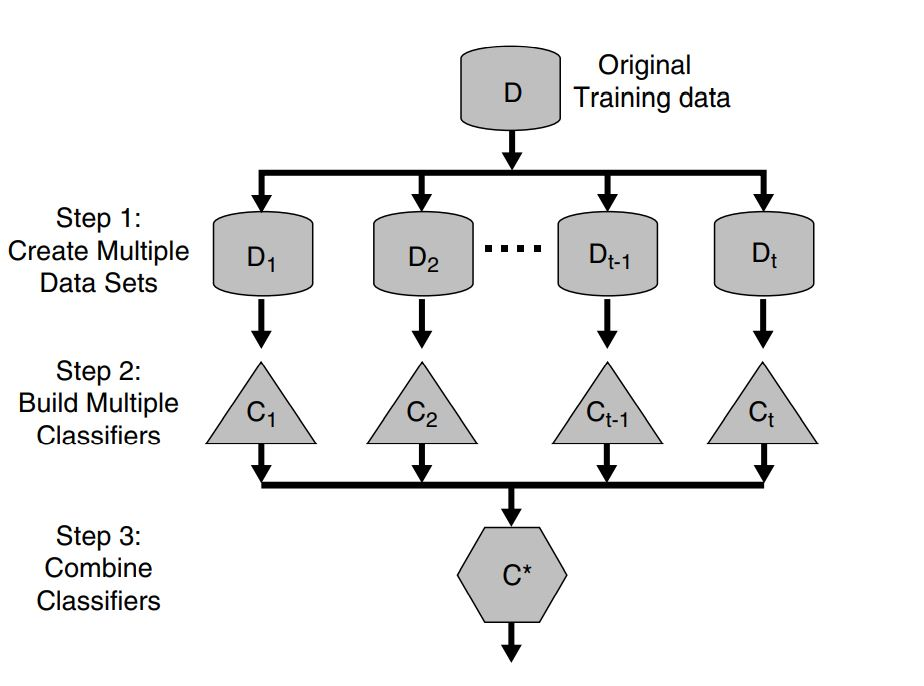

(Tan,2014)

**Algorithm**

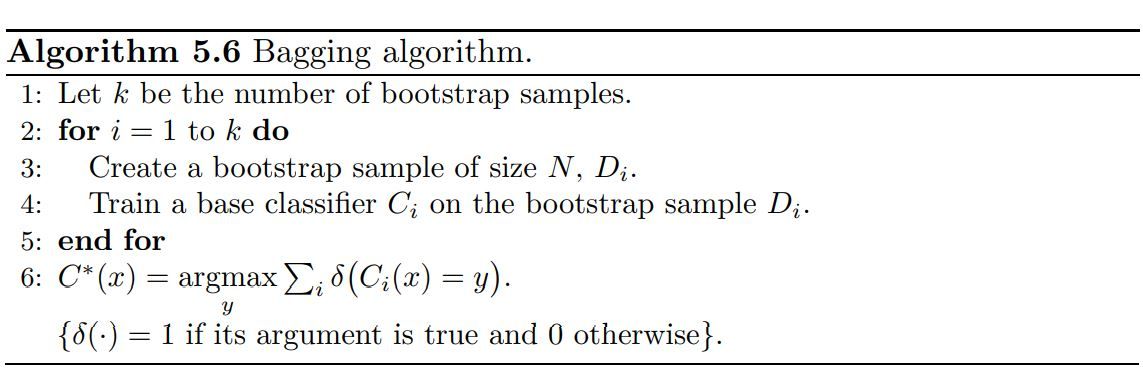

(Tan,2014)

Bagging help to decrease variance of base classifiers which affect generalization error. If base classifier unstable, bagging reduce errors. If base classifer  is stable, robust it minorly. However, it could degrade base classifier in some conditions if training set smaller than 37% of original data.


Bagging does not focus on any particular instance of training data. So, it is more reliable to model overfitting when applied to noisy data.


## Bagging Multinomial Bayes

In order to get a slightly better result we attempt bagging, but it is unlikely that this will be overly helpful. There are several reasons for this such as even a "small" sample (100K etc) being fairly representative of the dataset as a whole and thus multiple samples are not likely to result in major changes.

In [17]:
## BAGGING MULTINOMIAL BAYES
# MNB start timer
print('Bagging Multinomial Naive Bayes')
start = timeit.default_timer()
# Set bagging
bmnb = BaggingClassifier(base_estimator=MultinomialNB(),
                n_jobs=3, verbose=0, n_estimators=600, random_state=0,
                max_samples=(620*(10**3))
                ).fit(trainX, trainY)
stop = timeit.default_timer()
print('Training time: ', stop - start)
start = timeit.default_timer()
# Make prediction
y_pred = bmnb.predict(testX)
# MNB stop timer
stop = timeit.default_timer()
print('Test time: ', stop - start)
#Performance Measures
accuracy_bmb = 100*accuracy_score(testY,y_pred)
precision_bmb = 100*precision_score(testY,y_pred)
f1_bmb = 100*f1_score(testY,y_pred)
# Printing results
print("Out of", len(testY), 'datapoints')
print("Accuracy: {:.04f}%".format(accuracy_bmb))
print("Precision: {:.04f}%".format(precision_bmb))
print("F1 score: {:.04f}%".format(f1_bmb))
m = confusion_matrix(y_true=testY, y_pred=y_pred)
print("Confusion Matrix: \n",m)

Bagging Multinomial Naive Bayes
Training time:  922.5677032999997
Test time:  95.25900760000013
Out of 400000 datapoints
Accuracy: 84.0872%
Precision: 84.5571%
F1 score: 83.9783%
Confusion Matrix: 
 [[169534  30466]
 [ 33185 166815]]


As we can see this acually led to a worse result.

In [24]:
y_perf_bmb = np.array(["Accuracy","Precision","F1"])
ypos = np.arange(len(y_perf_mb))
y_val_bmb = np.array([accuracy_bmb,precision_bmb,f1_bmb])

<BarContainer object of 3 artists>

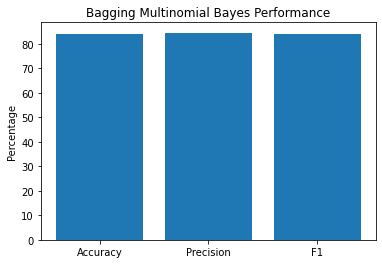

In [25]:
plt.xticks(ypos,y_perf_mb)
plt.ylabel("Percentage")
plt.title("Bagging Multinomial Bayes Performance")
plt.bar(ypos,y_val_mb)

In [29]:
y_accu_bayesian = np.array(["MultiBayes","Bagging"])
y_f1_bayesian = np.array(["MultiBayes","Bagging"])
ypos = np.arange(len(y_accu_bayesian))
y_val_accubay = np.array([accuracy_mb,accuracy_bmb])
y_val_f1bay = np.array([f1_mb,f1_bmb])

<BarContainer object of 2 artists>

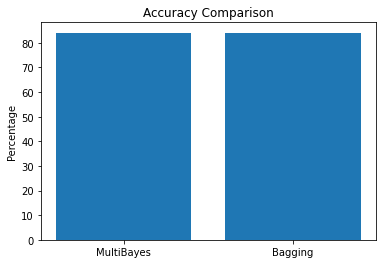

In [30]:
plt.xticks(ypos,y_accu_bayesian)
plt.ylabel("Percentage")
plt.title("Accuracy Comparison")
plt.bar(ypos,y_val_accubay)

<BarContainer object of 2 artists>

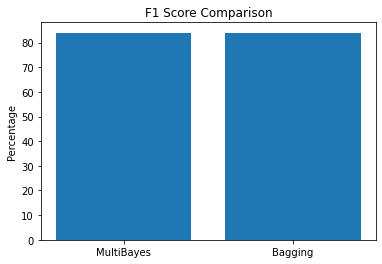

In [31]:
plt.xticks(ypos,y_f1_bayesian)
plt.ylabel("Percentage")
plt.title("F1 Score Comparison")
plt.bar(ypos,y_val_f1bay)

## References

Tan, P.-N., Steinbach, M., & Kumar, V. (2014). Introduction to Data Mining. Edinburgh: Pearson.

Walpole, E. R., Myers, H. R., Myers, L. S., & Ye, K. (2017). Probability & Statistics for Engineers & Scientists. Boston: Prentice Hall.

